In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV#For cross vallidation 
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix # create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draw the confusion matrix
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer

In [ ]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
def unique_counts(df):
  for i in df.columns:
    count=df[i].nunique()
    print(i,":",count)

In [ ]:
unique_counts(df)

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
X=df.drop(['target'],axis =1).copy()
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y = df['target'].copy()
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
sum(y)/len(y)

0.5445544554455446

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
sum(y_train)/len(y_train)

0.5462555066079295

In [ ]:
sum(y_test)/len(y_test)

0.5394736842105263

In [ ]:
sum(y_test)

41

In [ ]:
params={
    'max_depth':[3,4,5],
    'learning_rate':[1,0.5,0.3,0.1,0.05], #<0.05 == overfitting
    'gamma':[0,0.25,0.5,1],
    'scale_pos_weight':[1,3,5],
    'reg_lambda':[0,1,10,20,100],
    'sub_sample':[0.5,0.6,0.7,0.8,0.9],
    'colsample_bytree': [0.3,0.4,0.5,0.7 ]

}

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing=None,seed=42)

In [ ]:
random_search=RandomizedSearchCV(clf_xgb,
                                 param_distributions=params,
                                #  n_iter=4,
                                 scoring='roc_auc',
                                #  n_jobs=10,
                                #  cv=5,
                                 verbose=0)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,
                   y_train,
                   verbose=False,########
                   early_stopping_rounds=10,
                   eval_metric = 'auc',########
                   eval_set = [(X_test,y_test)]
                   )
timer(start_time)


 Time taken: 0 hours 0 minutes and 0.83 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.25, learning_rate=1, max_depth=4,
              reg_lambda=20, scale_pos_weight=3, seed=42, sub_sample=0.7)

In [ ]:
#========================================Round 1====================================================

In [ ]:
# XGBClassifier(colsample_bytree=0.5, gamma=0.25, learning_rate=1, max_depth=5,
#               reg_lambda=20, seed=42, sub_sample=0.6)

In [ ]:
clf_xgb = xgb.XGBClassifier(colsample_bytree=0.5, gamma=0.25, learning_rate=1, max_depth=5,
              reg_lambda=20, seed=42, sub_sample=0.6)

In [ ]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,####
            early_stopping_rounds=10,
            eval_metric = 'aucpr',####
            eval_set = [(X_test,y_test)])

[0]	validation_0-aucpr:0.749289
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.773611
[2]	validation_0-aucpr:0.877845
[3]	validation_0-aucpr:0.883607
[4]	validation_0-aucpr:0.897924
[5]	validation_0-aucpr:0.88783
[6]	validation_0-aucpr:0.886759
[7]	validation_0-aucpr:0.892972
[8]	validation_0-aucpr:0.899757
[9]	validation_0-aucpr:0.894617
[10]	validation_0-aucpr:0.901948
[11]	validation_0-aucpr:0.899553
[12]	validation_0-aucpr:0.902167
[13]	validation_0-aucpr:0.903381
[14]	validation_0-aucpr:0.910603
[15]	validation_0-aucpr:0.91062
[16]	validation_0-aucpr:0.903932
[17]	validation_0-aucpr:0.899534
[18]	validation_0-aucpr:0.897948
[19]	validation_0-aucpr:0.899744
[20]	validation_0-aucpr:0.90085
[21]	validation_0-aucpr:0.898502
[22]	validation_0-aucpr:0.902883
[23]	validation_0-aucpr:0.897172
[24]	validation_0-aucpr:0.894955
[25]	validation_0-aucpr:0.899437
Stopping. Best iteration:
[15]	validation_0-aucpr:0.91062



XGBClassifier(colsample_bytree=0.5, gamma=0.25, learning_rate=1, max_depth=5,
              reg_lambda=20, seed=42, sub_sample=0.6)

In [ ]:
y_pred=clf_xgb.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


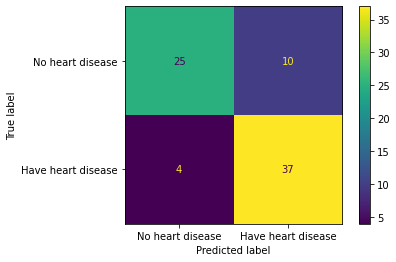

In [ ]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels = ["No heart disease",'Have heart disease'])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_pred=y_pred,y_true = y_test).ravel()
tn

37

In [ ]:
(tn/sum(y_test))*100

90.2439024390244

In [ ]:
#========================================Round 2====================================================

In [ ]:
# XGBClassifier(colsample_bytree=0.4, gamma=1, learning_rate=1, max_depth=4,
#               reg_lambda=20, scale_pos_weight=3, seed=42, sub_sample=0.5)

In [ ]:
clf_xgb = xgb.XGBClassifier(colsample_bytree=0.4, gamma=1, learning_rate=1, max_depth=4,
              reg_lambda=20, scale_pos_weight=3, seed=42, sub_sample=0.5)

In [ ]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,####
            early_stopping_rounds=10,
            eval_metric = 'aucpr',####
            eval_set = [(X_test,y_test)])

[0]	validation_0-aucpr:0.684789
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.748922
[2]	validation_0-aucpr:0.772514
[3]	validation_0-aucpr:0.779579
[4]	validation_0-aucpr:0.888986
[5]	validation_0-aucpr:0.885925
[6]	validation_0-aucpr:0.878379
[7]	validation_0-aucpr:0.885162
[8]	validation_0-aucpr:0.895309
[9]	validation_0-aucpr:0.893258
[10]	validation_0-aucpr:0.892592
[11]	validation_0-aucpr:0.891865
[12]	validation_0-aucpr:0.889808
[13]	validation_0-aucpr:0.877121
[14]	validation_0-aucpr:0.886479
[15]	validation_0-aucpr:0.886479
[16]	validation_0-aucpr:0.886479
[17]	validation_0-aucpr:0.886479
[18]	validation_0-aucpr:0.886479
Stopping. Best iteration:
[8]	validation_0-aucpr:0.895309



XGBClassifier(colsample_bytree=0.4, gamma=1, learning_rate=1, max_depth=4,
              reg_lambda=20, scale_pos_weight=3, seed=42, sub_sample=0.5)

In [ ]:
y_pred=clf_xgb.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


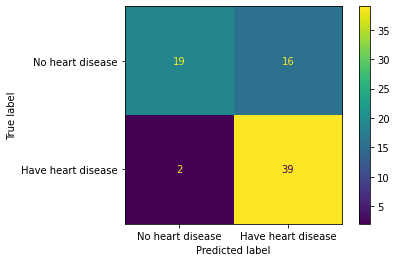

In [ ]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels = ["No heart disease",'Have heart disease'])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_pred=y_pred,y_true = y_test).ravel()
tn

39

In [ ]:
(tn/sum(y_test))*100

95.1219512195122

In [ ]:
#========================================Round 3====================================================

In [ ]:
# XGBClassifier(colsample_bytree=0.5, gamma=0.25, learning_rate=1, max_depth=4,
#               reg_lambda=20, scale_pos_weight=3, seed=42, sub_sample=0.7)


In [ ]:
clf_xgb = xgb.XGBClassifier(colsample_bytree=0.5, gamma=0.25, learning_rate=1, max_depth=4,
              reg_lambda=20, scale_pos_weight=3, seed=42, sub_sample=0.7)



In [ ]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,####
            early_stopping_rounds=10,
            eval_metric = 'aucpr',####
            eval_set = [(X_test,y_test)])

[0]	validation_0-aucpr:0.710357
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.741457
[2]	validation_0-aucpr:0.838549
[3]	validation_0-aucpr:0.86218
[4]	validation_0-aucpr:0.857593
[5]	validation_0-aucpr:0.860328
[6]	validation_0-aucpr:0.882004
[7]	validation_0-aucpr:0.885048
[8]	validation_0-aucpr:0.892342
[9]	validation_0-aucpr:0.891332
[10]	validation_0-aucpr:0.889396
[11]	validation_0-aucpr:0.884141
[12]	validation_0-aucpr:0.893466
[13]	validation_0-aucpr:0.892795
[14]	validation_0-aucpr:0.891129
[15]	validation_0-aucpr:0.896248
[16]	validation_0-aucpr:0.883919
[17]	validation_0-aucpr:0.880871
[18]	validation_0-aucpr:0.877316
[19]	validation_0-aucpr:0.878842
[20]	validation_0-aucpr:0.880479
[21]	validation_0-aucpr:0.877554
[22]	validation_0-aucpr:0.880167
[23]	validation_0-aucpr:0.881335
[24]	validation_0-aucpr:0.875223
[25]	validation_0-aucpr:0.872641
Stopping. Best iteration:
[15]	validation_0-aucpr:0.896248



XGBClassifier(colsample_bytree=0.5, gamma=0.25, learning_rate=1, max_depth=4,
              reg_lambda=20, scale_pos_weight=3, seed=42, sub_sample=0.7)

In [ ]:
y_pred=clf_xgb.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


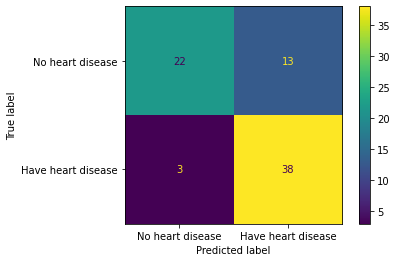

In [ ]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels = ["No heart disease",'Have heart disease'])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_pred=y_pred,y_true = y_test).ravel()
tn

38

In [ ]:
(tn/sum(y_test))*100

92.6829268292683